<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the data
df = pd.read_csv('HIV_AIDS_Diagnoses_by_Neighborhood__Sex__and_Race_Ethnicity.csv')

## Display top 7 rows of the dataframe in your notebook

In [3]:
# display top 7 rows of the data frame
df.head(7)

,YEAR,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
2,2010,Southeast Queens,Male,All,23,25.4,5,21.7,14,15.4
3,2012,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,Willowbrook,Male,Unknown,0,0,0,0,0,0
5,2013,East Flatbush - Flatbush,Male,Black,54,56.5,8,14.8,33,34.5
6,2013,East Flatbush - Flatbush,Female,Native American,0,0,0,0,0,0


## Count number of null values (if any) for each column

In [4]:
# display number of null values for each column
df.isnull().sum()

YEAR                                                                    0
Neighborhood (U.H.F)                                                    0
SEX                                                                     0
RACE/ETHNICITY                                                          0
TOTAL NUMBER OF HIV DIAGNOSES                                           0
HIV DIAGNOSES PER 100,000 POPULATION                                   68
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    68
TOTAL NUMBER OF AIDS DIAGNOSES                                          0
AIDS DIAGNOSES PER 100,000 POPULATION                                  68
dtype: int64

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [5]:
# display columns
columns = df.columns.values
print(columns)

['YEAR' 'Neighborhood (U.H.F)' 'SEX' 'RACE/ETHNICITY'
 'TOTAL NUMBER OF HIV DIAGNOSES' 'HIV DIAGNOSES PER 100,000 POPULATION'
 'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'
 'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES'
 'TOTAL NUMBER OF AIDS DIAGNOSES' 'AIDS DIAGNOSES PER 100,000 POPULATION']


In [6]:
# select columns that will be used
new_columns = ['TOTAL NUMBER OF HIV DIAGNOSES','TOTAL NUMBER OF AIDS DIAGNOSES']

# make a new dataframe from new columns
df_new = df[new_columns]

In [7]:
df_new

,TOTAL NUMBER OF HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES
0,6,5
1,0,0
2,23,14
3,0,0
4,0,0
...,...,...
2923,8,6
2924,0,0
2925,0,0
2926,6,3


## Display the average, median, and standard deviation of each of your numerical columns

In [8]:
# display new_df info
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   TOTAL NUMBER OF HIV DIAGNOSES   2928 non-null   object
 1   TOTAL NUMBER OF AIDS DIAGNOSES  2928 non-null   object
dtypes: object(2)
memory usage: 45.9+ KB


because the data are object data type, the data must be changed to numeric data type

In [9]:
# changed data type
df_new = df_new.astype('int64')

ValueError: invalid literal for int() with base 10: '*'

from this result can be said that in the columns, there are the data that are not numeric value, one of them maybe "*" . that's why the values in the columns can not be changed to int64, so we must change the value to numeric value

In [10]:
df_new = df_new.copy()

for i in df_new.columns:
    df_new.loc[:,i]=pd.to_numeric(df_new.loc[:,i], errors = 'coerce', downcast='integer')

In [11]:
# display info to make sure data types have changed
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TOTAL NUMBER OF HIV DIAGNOSES   2918 non-null   float64
 1   TOTAL NUMBER OF AIDS DIAGNOSES  2918 non-null   float64
dtypes: float64(2)
memory usage: 45.9 KB


In [12]:
# display columns describe
df_new.describe()

,TOTAL NUMBER OF HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES
count,2918.000000,2918.000000
mean,16.994517,11.954078
std,118.436474,83.944841
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,10.750000,7.000000
max,3353.000000,2611.000000


Can be seen there are null values and outliers, null values can be seen from count each column, should count of each column are 2928, but only 2918.
Whereas outliers can be seen from mean and max from each column which is far from away each other. The outlier can be seen clearly if it can be visualized

In [13]:
# change nan values with median of the data
df_new = df_new.fillna(df_new.median())

In [14]:
df_new.describe()

,TOTAL NUMBER OF HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES
count,2928.000000,2928.000000
mean,16.939891,11.913251
std,118.237668,83.804224
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,10.000000,7.000000
max,3353.000000,2611.000000


## Plot two of the numerical columns one against the other in a scatter plot

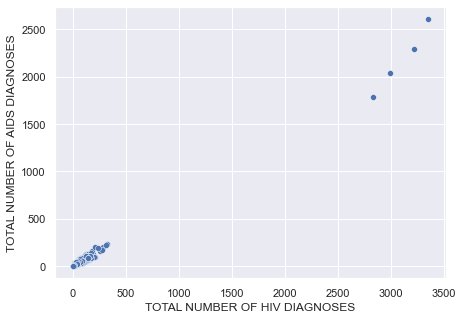

In [15]:
plt.figure(figsize=(7,5))
sns.set(style="darkgrid")
sns.scatterplot(data=df_new, x='TOTAL NUMBER OF HIV DIAGNOSES', y='TOTAL NUMBER OF AIDS DIAGNOSES')
plt.show()

The outliers can be seen from this visualization, can be seen there are many data which is far away from most data

## Plot the data distribution of all your numerical columns in histogram and boxplot

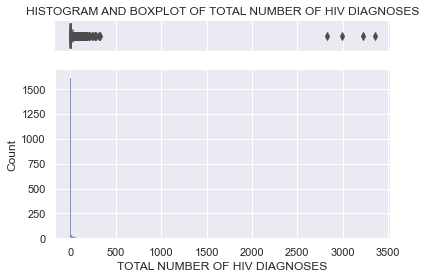

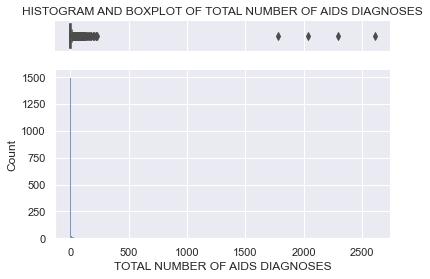

In [16]:
sns.set(style='darkgrid')

for col in df_new.columns:
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x=df_new[col], ax=ax_box)
    sns.histplot(data = df_new, x =col, ax=ax_hist)
    
    ax_box.set(yticks=[], xlabel='', title = f'HISTOGRAM AND BOXPLOT OF {col}')
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.show()

from these histograms and boxplots can be seen the outliers too

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [17]:
# Make function to raised power each value in one column
def raised_power(df):
    df_final = df**2
    return df_final

In [18]:
# apply the function
df_new['raised_power_HIV']=df_new['TOTAL NUMBER OF HIV DIAGNOSES'].apply(raised_power)
df_new['raised_power_AIDS']=df_new['TOTAL NUMBER OF AIDS DIAGNOSES'].apply(raised_power)

In [19]:
# display the results
df_new

,TOTAL NUMBER OF HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,raised_power_HIV,raised_power_AIDS
0,6.0,5.0,36.0,25.0
1,0.0,0.0,0.0,0.0
2,23.0,14.0,529.0,196.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
2923,8.0,6.0,64.0,36.0
2924,0.0,0.0,0.0,0.0
2925,0.0,0.0,0.0,0.0
2926,6.0,3.0,36.0,9.0


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [35]:
import pandas as pd 
df_bike = pd.read_csv('201709-citibike-tripdata.csv')
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878098 entries, 0 to 1878097
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               float64
 14  gender                   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 214.9+ MB


In [36]:
df_bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1


In [37]:
df_bike.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.878098e+06,1.878098e+06,1.878098e+06,1.878098e+06,1.878098e+06,1.878098e+06,1.878098e+06,1.878098e+06,1.670630e+06,1.878098e+06
mean,9.970889e+02,1.388937e+03,4.073640e+01,-7.398490e+01,1.380262e+03,4.073594e+01,-7.398489e+01,2.426305e+04,1.979535e+03,1.121767e+00
std,8.104110e+03,1.357404e+03,4.119264e-02,5.668582e-02,1.355082e+03,7.812362e-02,1.333691e-01,5.437543e+03,1.171327e+01,5.799703e-01
min,6.100000e+01,7.200000e+01,0.000000e+00,-7.402535e+01,7.200000e+01,0.000000e+00,-7.408585e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.920000e+02,3.620000e+02,4.071757e+01,-7.399705e+01,3.620000e+02,4.071755e+01,-7.399724e+01,1.891000e+04,1.972000e+03,1.000000e+00
50%,6.590000e+02,4.900000e+02,4.073705e+01,-7.398765e+01,4.870000e+02,4.073650e+01,-7.398776e+01,2.595900e+04,1.982000e+03,1.000000e+00
75%,1.136000e+03,3.147000e+03,4.075527e+01,-7.397606e+01,3.144000e+03,4.075514e+01,-7.397621e+01,2.897800e+04,1.989000e+03,1.000000e+00
max,2.215580e+06,3.637000e+03,4.081433e+01,0.000000e+00,3.637000e+03,4.081433e+01,0.000000e+00,3.197900e+04,2.001000e+03,2.000000e+00


## Count the number of missing values of each column

In [38]:
df_bike.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 207468
gender                          0
dtype: int64

In [39]:
# fill nan values with median
df_bike['birth year']=df_bike['birth year'].fillna(df_bike['birth year'].median())

In [40]:
# check again the nan values
df_bike.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

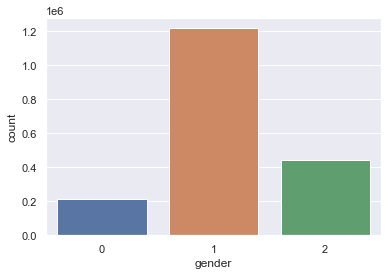

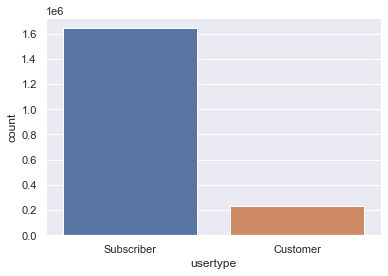

In [41]:
columns = ['gender', 'usertype']

for col in columns:
    sns.countplot(x=col, data = df_bike)
    plt.show()

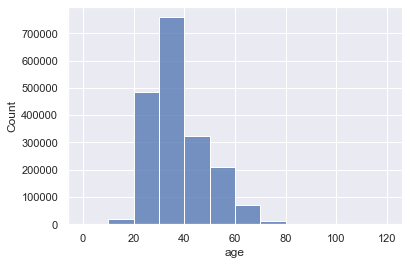

In [42]:
# make series 'age' from substraction 2017 and birth year
df_bike['age']=2017-df_bike['birth year']
sns.histplot(x='age', data=df_bike, binwidth=10, binrange=(0,116))
plt.show()

from these visualizations, can be inferred that are from gender, the most gender who rides a bike is from gender 1 (men). From usertype, the most usertype who rides a bike is from subscriber, and for the age, the most age who rides a bike is from range 20-40.

## What is the average number of trips per day?

In [43]:
round(df_bike['usertype'].count()/30, 0)

62603.0

## What is the average trip duration?

In [44]:
round(df_bike['tripduration'].mean(),0)

997.0

## What days of the week are most rides taken on?
Process the data and plot your answer

In [45]:
# change 'start time' and 'stop time' data types
df_bike['starttime'] = pd.to_datetime(df_bike['starttime'])
df_bike['stoptime'] = pd.to_datetime(df_bike['stoptime'])

In [46]:
# make column day of week
df_bike['dayofweek'] = df_bike['starttime'].dt.dayofweek
df_bike

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,dayofweek
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1,24.0,4
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1,29.0,4
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1,48.0,4
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1,24.0,4
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1,30.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878093,621,2017-09-30 23:59:30,2017-10-01 00:09:52,3366,West End Ave & W 107 St,40.802117,-73.968181,3540,Morningside Ave & W 123 St,40.810000,-73.955151,28812,Subscriber,1980.0,2,37.0,5
1878094,656,2017-09-30 23:59:33,2017-10-01 00:10:30,3163,Central Park West & W 68 St,40.773407,-73.977825,479,9 Ave & W 45 St,40.760193,-73.991255,19088,Subscriber,1986.0,1,31.0,5
1878095,516,2017-09-30 23:59:40,2017-10-01 00:08:16,3224,W 13 St & Hudson St,40.739974,-74.005139,382,University Pl & E 14 St,40.734927,-73.992005,29922,Subscriber,1982.0,0,35.0,5
1878096,1039,2017-09-30 23:59:49,2017-10-01 00:17:08,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,3336,E 97 St & Madison Ave,40.787801,-73.953559,26007,Subscriber,1990.0,1,27.0,5


<AxesSubplot:xlabel='dayofweek'>

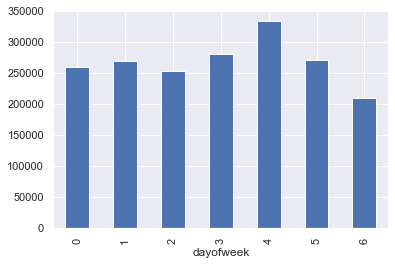

In [47]:
# groupby dayofweek and bikeid then visualize
df_bike.groupby(['dayofweek'])['bikeid'].count().plot.bar()

the day of week with 0=monday to 6=sunday. 
from this visualization can be inferred that is the days of the week are most rides taken on is friday 

## What hour of the day are most rides taken on?
Process the data and plot your answer

In [48]:
df_bike['hourofday'] = df_bike['starttime'].dt.hour
df_bike

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,dayofweek,hourofday
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1,24.0,4,0
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1,29.0,4,0
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1,48.0,4,0
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1,24.0,4,0
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1,30.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878093,621,2017-09-30 23:59:30,2017-10-01 00:09:52,3366,West End Ave & W 107 St,40.802117,-73.968181,3540,Morningside Ave & W 123 St,40.810000,-73.955151,28812,Subscriber,1980.0,2,37.0,5,23
1878094,656,2017-09-30 23:59:33,2017-10-01 00:10:30,3163,Central Park West & W 68 St,40.773407,-73.977825,479,9 Ave & W 45 St,40.760193,-73.991255,19088,Subscriber,1986.0,1,31.0,5,23
1878095,516,2017-09-30 23:59:40,2017-10-01 00:08:16,3224,W 13 St & Hudson St,40.739974,-74.005139,382,University Pl & E 14 St,40.734927,-73.992005,29922,Subscriber,1982.0,0,35.0,5,23
1878096,1039,2017-09-30 23:59:49,2017-10-01 00:17:08,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,3336,E 97 St & Madison Ave,40.787801,-73.953559,26007,Subscriber,1990.0,1,27.0,5,23


<AxesSubplot:xlabel='hourofday'>

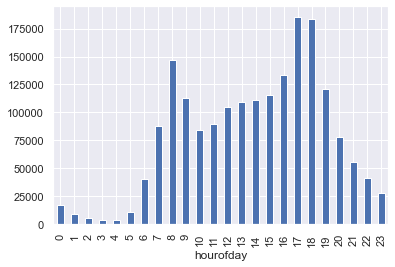

In [49]:
df_bike.groupby(['hourofday'])['bikeid'].count().plot.bar()

the hour of the day with 0 = 00.00 to 23 = 23.00. 
from this visualization can be inferred that is hour of the day are most rides taken on is 17.00

## Is there correlation between age and trip duration?

In [50]:
df_bike[['age', 'tripduration']].corr()

,age,tripduration
age,1.000000,-0.006093
tripduration,-0.006093,1.000000


from that table, can be inferred that is the correlation between age and trip duration is weak

## What are the top 10 pair of stations that our riders use as a start & stopping point?

<AxesSubplot:ylabel='start station name,end station name'>

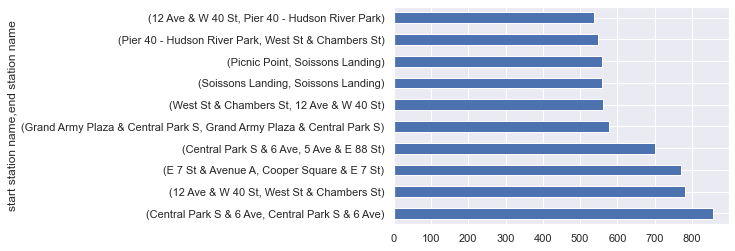

In [51]:
df_bike.groupby(['start station name','end station name']).size().sort_values(ascending=False).iloc[:10].plot.barh()

## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



Question: Men (1) are more often use and use longer bicycles than woman (2) 

Null Hypothesis :
1. The average trip duration of men is the same or lower than the average trip duration of women
2. The count of 'bikeid' from men is the same or lower than the count 'bikeid' from women
                   

## Work with your dataset and show your findings to help answer your question

In [53]:
# The average trip duration of men is the same or lower than the average trip duration of women
df_bike.groupby(['gender'])['tripduration'].mean()

gender
0    1750.279727
1     865.293398
2     993.322069
Name: tripduration, dtype: float64

from this result, can be inferred that is first null hypothesis is accepted, so that the average trip duration of men is lower than the average trip duration of women 

In [54]:
# The count of 'bikeid' from men is the same or lower than the count 'bikeid' from women
df_bike.groupby(['gender'])['bikeid'].count()

gender
0     215442
1    1218524
2     444132
Name: bikeid, dtype: int64

from this visualization, can be inferred that is second null hypothesis is rejected, so that the count of 'bikeid' from men is higher than the count of 'bikeid' from woman

From the question above, can be inferred that men are more often use bicycles, but no longer than woman

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```